<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/Projects/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. 



# Aim

I will be retrieving, cleaning or formatting the data if necessary. I will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).

Visualise and analyse the data in the following ways:

*   A line plot
*   A bar chart
*   A set of box plots
*   Predict the number of page views in the year 2020 based on the data up to 2019

# About Data

The page view data records the numbers of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03.

## Data Source

The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

## Import packages

In [82]:
# Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime, date
import datetime as dt

from pandas.core.algorithms import quantile
from scipy.stats import linregress

import matplotlib.pyplot as plt
import seaborn as sns

## Data Retrieval
The get_data() function is used for getting csv file with a passing in url parameter. It will return a dataframe result.

clean_data function is used for removing rows with nan/null data and duplicates, and also sorting data by a passing in field. It returns a cleaned dataframe.





In [83]:
# Data retrieval from a csv file from githut
def get_data(url):
  df = pd.read_csv(url)
  
  return df


Let's assign the url to the url variable and passing it to the get_data() function. We will get a dataframe and assign to a dataframe variable.


In [84]:
# Programs starts here
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
original_df = get_data(url)   # Data retriveal

##Inspect Data


This dataset contains two columns: date(String) and value (integer type). 

In [85]:
print(original_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB
None


I will check if it contains any missing data.

In [86]:
original_df.isnull().values.any()

False

This any_nulls() function is passing in a dataframe and returning if each column contains null values in boolean values True or False.

In [87]:
#find any null values for each column
def any_nulls(df):
  df_null = df.isna().any()
  return df_null

null_values = any_nulls(original_df)
print(null_values)

date     False
value    False
dtype: bool


## Cleaning, Sorting Data
This clean_data() function is using for dropping off nan / null value records, dropping off duplicates rows and sort_values by a column.  Finally, returning the dataframe. We might need to convert the data type later. 

In [88]:
# Sort and clean data
def clean_data(original_df, sortby):
  # sort dataframe by date
  original_df = original_df.sort_values(by = sortby, ascending = True)
  original_df = original_df.dropna()
  original_df = original_df.drop_duplicates()
  return original_df


Let's pass in the original dataframe and the sorting column to the clean_data() function. We will gain a new dataframe and assign to cleaned_df variable.

In [89]:
cleaned_df = clean_data(original_df, 'date')   # sort and clean data

The code cell below will test if the first records index is 0 and total records is 1304. If yes, then we got Test passed result.

In [90]:
# The code below will run and test your code to see if you have returned a series with the correct length and first row
actual = cleaned_df.index[0]
expected = 0

if actual == expected and len(cleaned_df) == 1304:
  print("Test passed", actual)
else:
  print("Test failed","Should have got", expected, "got", actual, "and length of series should have been 1304 but was", len(clean_data(original_df)))


Test passed 0


Let's have a look of the new dataframe records.

In [91]:
display(cleaned_df)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


# Data Analysis & Visualisation

## 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.




### Preparing Data
To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [92]:
# Make a copy of the cleaned dataframe and make changes on the copy_df
copy_df = cleaned_df.copy()

In [93]:
# convert the date column to datetime type
copy_df['date'] = pd.to_datetime(copy_df.date)
copy_df.date

0      2016-05-09
1      2016-05-10
2      2016-05-11
3      2016-05-12
4      2016-05-13
          ...    
1299   2019-11-29
1300   2019-11-30
1301   2019-12-01
1302   2019-12-02
1303   2019-12-03
Name: date, Length: 1304, dtype: datetime64[ns]

In [94]:
# create 3 new columns for year , month and day from the date column
copy_df['year'] = copy_df.date.dt.year  
copy_df['month'] = copy_df.date.dt.strftime("%m") 
copy_df['day'] = copy_df.date.dt.day 

In [95]:
# set index to the date column
copy_df = copy_df.set_index('date') #,inplace=True)

Let's have a look the data now. Now, the date has became index.

In [96]:
copy_df

,value,year,month,day
date,,,,
2016-05-09,1201,2016,05,9
2016-05-10,2329,2016,05,10
2016-05-11,1716,2016,05,11
2016-05-12,10539,2016,05,12
2016-05-13,6933,2016,05,13
...,...,...,...,...
2019-11-29,171584,2019,11,29
2019-11-30,141161,2019,11,30
2019-12-01,142918,2019,12,1


This code cell below will help us to produce the plots and you will them clearly in the box plot later on.

Outliers increase the variability in the data, which decreases the statistical power. Therefore, excluding outliers can cause your results to become statistically significant.

I use pandas's quantile() method to fetch the upper quantile (Q3) and lower quantile(Q1). 

In [97]:
# filter out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
top = copy_df['value'].quantile(0.975)
bottom = copy_df['value'].quantile(0.025)

We need to remove the outliers in the data set. 

In [98]:
# remove outliers
final_df = copy_df[(copy_df['value'] <= top) & (copy_df['value'] >= bottom)]   

### Visualisation - the line plot

The function generate_lineplot() is using for drawing a line plot by passing in the dataframe, column name, the title of the line chart, labels for x and y. 

In [99]:
def generate_lineplot(df,col,charttitle,x_label,y_label):
  # Line Plot using 'plot' function on dataframe
  data = df[col] 
  labels = data.keys()
  df[col].plot(kind='line', figsize=(16, 6), title=charttitle, fontsize=10, color='red', linewidth=2) #, marker='o', markersize=2);
  plt.xticks(rotation=45)
  plt.xlabel(x_label, fontsize=12)
  plt.ylabel(y_label, fontsize=12)
  plt.show()


Excute the generate_line_plot function and draw the line plot.

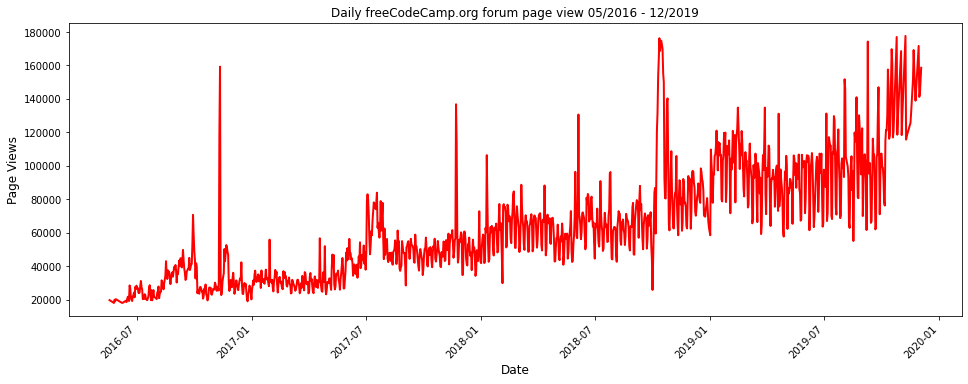

In [100]:
#Generate Line Plot
generate_lineplot(final_df, 'value','Daily freeCodeCamp.org forum page view 05/2016 - 12/2019','Date', 'Page Views')

##2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


### Preparing Data

We need to conver the final_df dataframe to pivot table in order to create the bar chart.  

Set the year as the index and set the month index as the columns. values will be still the value in pivot table. 

In [101]:
# convert dataframe to pivot table
df_pivot = final_df.pivot_table(index=final_df.index.year, columns=final_df.index.month, values='value', aggfunc='mean')

In [102]:
display(df_pivot)

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


### Visualisation - the bar chart

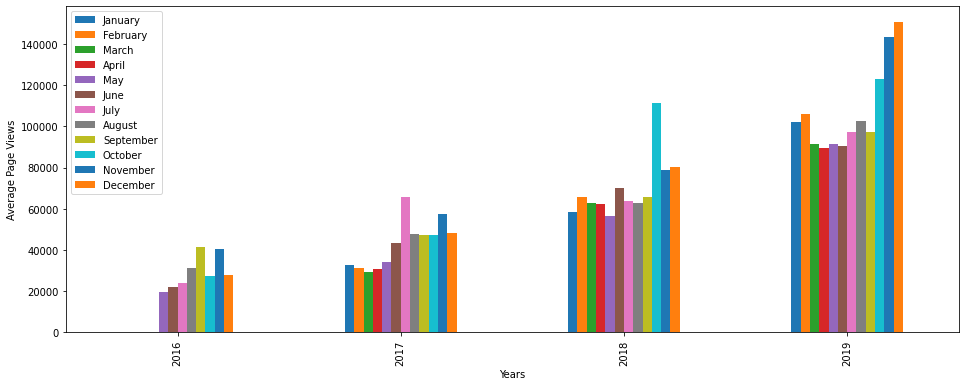

In [103]:
# Generate bar chart
fig, ax = plt.subplots(figsize=(16, 6))
df_pivot.plot(kind='bar', ax=ax)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
ax.legend(
    ['January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November','December']);
plt.show()


##3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


### Preparing Data

In [104]:
# make a copy of the final_df dataframe and save in a new dataframe variable. Also, sort the rows by month
boxplot_final_df = final_df.copy()

boxplot_final_df.sort_values(by=["month"], inplace=True)

In [105]:
# create a support series with the name of the month of each row
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = boxplot_final_df["month"].apply(lambda month: month_names[int(month)-1])

Have a look what in the months variable.

In [106]:
months

date
2017-01-06    Jan
2019-01-06    Jan
2019-01-05    Jan
2019-01-04    Jan
2019-01-03    Jan
             ... 
2017-12-29    Dec
2017-12-28    Dec
2017-12-27    Dec
2016-12-28    Dec
2019-12-03    Dec
Name: month, Length: 1238, dtype: object

### Visualisation - a set of box plots

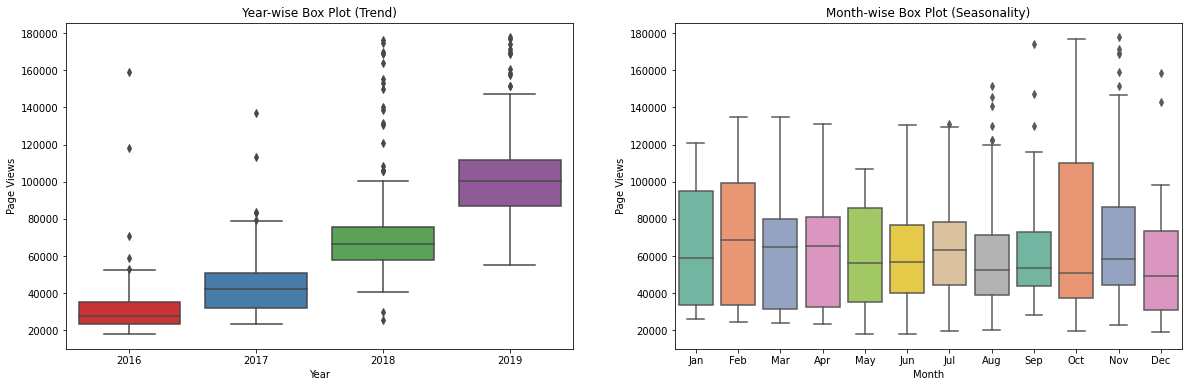

In [107]:
# draw seaborn boxplots by group

# setting the dimensions of the plot, 1 row and 2 columns 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

color_palette1 = "Set1"
color_palette2 = "Set2"
sns.boxplot(x='year', y='value', data=boxplot_final_df, orient='v', ax=axes[0], palette=color_palette1).set(title='Year-wise Box Plot (Trend)', xlabel='Year',ylabel='Page Views')
sns.boxplot(x=months, y='value', data=boxplot_final_df, orient='v', ax=axes[1], palette=color_palette2).set(title='Month-wise Box Plot (Seasonality)', xlabel='Month',ylabel='Page Views')
plt.show()


You can see there are some outliers for that data set.

##4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


### Preparing Data

Let's make a copy of final_df dataframe and make changes on the copy one. 

In [108]:
timestamps_final_df3 = final_df.copy()
timestamps_final_df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   value   1238 non-null   int64 
 1   year    1238 non-null   int64 
 2   month   1238 non-null   object
 3   day     1238 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 48.4+ KB


Convert the index value to datetime type and use .map() method to map Pandas datetime column to ordinal. 

In [109]:
# Covert the index value to datetime type and save in the created new columns in the dataframe
timestamps_final_df3['date_timestamps'] = pd.to_datetime(timestamps_final_df3.index.values)

# Use .map() method to map Pandas datetime column to ordinal timestamps
timestamps_final_df3['date_timestamps'] = timestamps_final_df3['date_timestamps'].map(dt.datetime.toordinal)
display(timestamps_final_df3)

,value,year,month,day,date_timestamps
date,,,,,
2016-05-19,19736,2016,05,19,736103
2016-05-26,18060,2016,05,26,736110
2016-05-27,19997,2016,05,27,736111
2016-05-28,19044,2016,05,28,736112
2016-05-29,20325,2016,05,29,736113
...,...,...,...,...,...
2019-11-24,138875,2019,11,24,737387
2019-11-29,171584,2019,11,29,737392
2019-11-30,141161,2019,11,30,737393


The function cal_lin_regress() is using for calculate slope, intercept, r-value and p-value to calculate the linear regression prediction values later. 

It uses the scipy.stats linregress() to create the linear regression model. Then get slope with .slope, intercept with .intercept, r-value with .rvalue and p-value with .pvalue to fetch the values. 

In [110]:
# calculate liner regression 
def cal_lin_regress(df,col1,col2):
  delta = df.index - df.index[0] # only works if it is an index
  x = delta.days # use days from start date
  y = df[col2]
  regression = linregress(x,y)
  slope = regression.slope
  yint = regression.intercept
  rsquared = (regression.rvalue)**2
  pval = regression.pvalue
  return slope, yint, rsquared, pval



# Calculate liner regression and assign the variables
slope, intercept,rsquared, pval = cal_lin_regress(timestamps_final_df3,"date","value")
print("slope =  ",round(slope,1),"\nintercept = ",round(intercept,1),"\nrsquared = ",round(rsquared,3),"\npval = ",pval,"\n")

slope =   73.2 
intercept =  16099.0 
rsquared =  0.692 
pval =  3.855767e-318 



The function predict_trend() is using for calculate the predicted value for each date's timestamp with the slope and intercept that We've calculated previously.  We will pass in year 2020, 2025 and 2030 to calculate the predict page views for these years.

In [114]:
# Prediction the trend values
def predict_trend(ayear_to_predict, start_date, slope, intercept):
  predict_date = dt.date(ayear_to_predict, 12, 31) 
  predict_date_toordinal = predict_date.toordinal() 
  delta_date = predict_date - start_date 
  predicted = intercept + slope * delta_date.days #delta_date is datetime.timedelta and can just view the .days
  return predicted


# Generate Plot & the earliest date
plot_df = final_df
y = plot_df['value']
x = plot_df.index
delta = plot_df.index - plot_df.index[0]
x_days = delta.days #use days from start date 
earliest_date = plot_df.index[0].date()

# Predict pageview trend
print("Prediction pageview for 2020, 2025 and 2030:")
for ayear in (2020,2025,2030):
  print(ayear, " = ",round(predict_trend(ayear, earliest_date, slope, intercept))) #min_date)))

Prediction pageview for 2020, 2025 and 2030:
2020  =  139507
2025  =  273084
2030  =  406661


### Visualisation - Linear Regression and the Best fit 

The function generate_plot_regression() is using for draw the scatter plot with a line of best fit. 

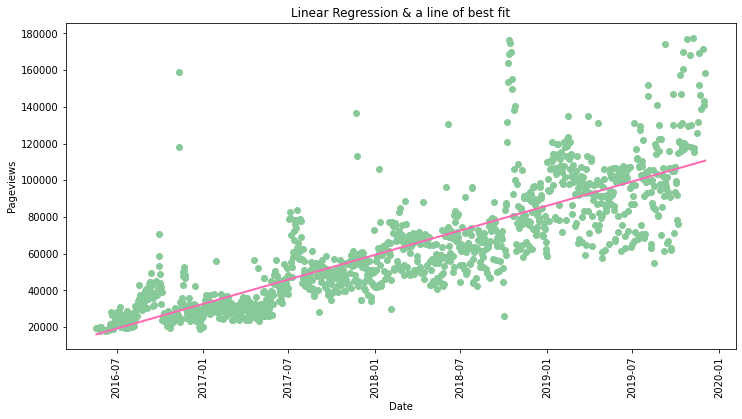

In [119]:
# generate scatter plot with linear regression 
def generate_plot_regression(x, y, slope, intercept, x_days):
  plt.figure(figsize=(12,6))
  plt.title('Linear Regression & a line of best fit')
  plt.ylabel("Pageviews")
  plt.xlabel("Date")
  plt.scatter(x,y, color = '#88c999')
  #best fit  
  plt.plot(x,  slope * x_days + intercept, color="hotpink", label = "Best Fit", linewidth=2) 
  plt.xticks(rotation=90) 
  plt.show()



generate_plot_regression(x, y, slope, intercept, x_days)

A common way to find a straight line that fits some scatter data is the least squares method.  
For a given set of points (xn, yn) and a line L, for each point you calculate the distance, dn, between the point and the line, then calculate the sum of the squares of the distances:  
s = d0*d0 + d1*d1 + d2*d2 ...  
This sum is a measure of the total error of the line fit. The best line is the one that has the smallest s value.
There is a formula for finding the best fit of a line to a set of (x, y) data points, and fortunately NumPy has an implementation of that formula:  
m, c = np.polyfit(year, value, 1). 
print(m, c)   
polyfit takes an array of x-values, and array of y-values, and a polynomial degree. Setting the degree to 1 gives a straight line fit.  
The m and c values plug into the standard equation of a straight line:  
y = m*x + c

This is a line that crosses the y-axis at c, and has a slope of m. If we plug is a couple of values for x (height 169 and 189), it gives us two points that we can use to draw the line


# Reflect

What skills I demostrated in the project? 

- Use pandas to retrieve data and process data, such as find null values, drop null valus, drop duplicates and sort the value by a column. 

- Conver data type. for example, convert string to Datetime, convert Datatime type to timestamps etc. 

- Change whole column values with apply method.

- Convert dataframe to pivot_table

- Test the code with if statments

- Use matplotlib.pyplot to create line, bar charts  

- seaborn sns.boxplot to box plot

What caused the biggest problems?

- If it's wrong dataframe, it will cause different result. 

- Converting Datetime format to unix timestamps is tricky when date is index.   

- using df = timestamps_final_df.index.to_julian_date() or .toordinal() to generate ordinal value will have different results. 

- Create Linear Regression model and find the best fit line


How did you solve these problems?

- Break problems to small pieces. 
- Search for the documents and asked teams. 